In [1]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/gdrive')

# Change directory to the location of the Yelp dataset
os.chdir('/content/gdrive/My Drive/Business Success Model/yelp_training_set')

# List the files in the directory
!ls

Mounted at /content/gdrive
Business_Success_Model.ipynb  predictions_review_ratings_combined_full.csv
feature_importance_plot.png   yelp_training_set_business.csv
final_dataset.csv	      yelp_training_set_review.csv
fine_tuned_bert_model	      yelp_training_set_user.csv


In [3]:
# Read the business data into a DataFrame
df_biz = pd.read_csv("yelp_training_set_business.csv")
df_biz

,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,type
0,rncjoVoEFUJGCUoC1JgnUA,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",True,"['Accountants', 'Professional Services', 'Tax ...",Peoria,3,Peoria Income Tax Service,[],-112.241596,AZ,5.0,33.581867,business
1,0FNFSzCFP_rGUoJx8W7tJg,"2149 W Wood Dr\nPhoenix, AZ 85029",True,"['Sporting Goods', 'Bikes', 'Shopping']",Phoenix,5,Bike Doctor,[],-112.105933,AZ,5.0,33.604054,business
2,3f_lyB6vFK48ukH6ScvLHg,"1134 N Central Ave\nPhoenix, AZ 85004",True,[],Phoenix,4,Valley Permaculture Alliance,[],-112.073933,AZ,5.0,33.460526,business
3,usAsSV36QmUej8--yvN-dg,"845 W Southern Ave\nPhoenix, AZ 85041",True,"['Food', 'Grocery']",Phoenix,5,Food City,[],-112.085377,AZ,3.5,33.392210,business
4,PzOqRohWw7F7YEPBz6AubA,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",True,"['Food', 'Bagels', 'Delis', 'Restaurants']",Glendale Az,14,Hot Bagels & Deli,[],-112.200264,AZ,3.5,33.712797,business
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,TCIVUf1frqLehZbaUnuQzQ,"1158 W Washington St\nSte 101\nTempe, AZ 85281",True,"['Mexican', 'Restaurants']",Tempe,18,Filiberto's Mexican Food,[],-111.955643,AZ,3.0,33.442375,business
11533,F3tqTcfKnljJcSyyqN0bbw,"8489 E McDonald Dr\nScottsdale, AZ 85250",True,"['Mexican', 'Restaurants']",Scottsdale,25,Los Favoritos Taco Shop,[],-111.897904,AZ,3.5,33.523891,business
11534,diW9KhKuhBCblBdnAkUkpQ,"550 E Bell Rd\nPhoenix, AZ 85022",True,"['Food', 'Grocery']",Phoenix,3,Safeway,[],-112.067004,AZ,4.5,33.640369,business
11535,tQTqlMW0sODNbe188ah1Yg,"8378 W Thunderbird Rd\nPeoria, AZ 85381",True,"['Greek', 'Mediterranean', 'Restaurants']",Peoria,23,Gyros Palace,[],-112.240062,AZ,3.5,33.611202,business


In [4]:
# Check for null values in the business DataFrame
df_biz.isnull().sum()

business_id      0
full_address     0
open             0
categories       0
city             0
review_count     0
name             0
neighborhoods    0
longitude        0
state            0
stars            0
latitude         0
type             0
dtype: int64

In [5]:
# Read the review data into a DataFrame
df_rev = pd.read_csv("yelp_training_set_review.csv")
df_rev

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw
...,...,...,...,...,...,...,...,...
229902,"{'funny': 0, 'useful': 0, 'cool': 0}",6e7pZofhDuIlD_rX2oYirQ,f9JaiNg_FMoPNWxt7MlbZQ,2,2011-04-14,I really wanted to like this place because it'...,review,vnffHkFJbmd-J3OaBbK2Eg
229903,"{'funny': 0, 'useful': 2, 'cool': 0}",dDNfSFT0VApxPmURclX6_g,QDWRP1pW5r0huIBAoGmFyg,1,2011-01-23,My husband I stayed here for two nights. Of c...,review,l5oUrgQ190l8CcN8uzd_pA
229904,"{'funny': 0, 'useful': 0, 'cool': 0}",M5wHt6Odh1k5v0tIjqd8DQ,JmR3yk7JlS1LVVxtIc3xBQ,4,2010-10-11,Cool atmosphere. A lot of beers on tap and goo...,review,-EctXOb3B7T177jGYUhjVA
229905,"{'funny': 1, 'useful': 2, 'cool': 0}",jopndPrv-H5KW2CfScnw9A,z5b2p5TbCg0uaIiIe8n62w,3,2011-01-18,I have to take a star off for the spotty servi...,review,YQvg0JCGRFUkb6reMMf3Iw


In [6]:
# Check for null values in the review DataFrame
df_rev.isnull().sum()

votes          0
user_id        0
review_id      0
stars          0
date           0
text           6
type           0
business_id    0
dtype: int64

In [7]:
# Drop rows with null values and reset the index in the review DataFrame
df_rev = df_rev.dropna()
df_rev = df_rev.reset_index(drop=True)
df_rev

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw
...,...,...,...,...,...,...,...,...
229896,"{'funny': 0, 'useful': 0, 'cool': 0}",6e7pZofhDuIlD_rX2oYirQ,f9JaiNg_FMoPNWxt7MlbZQ,2,2011-04-14,I really wanted to like this place because it'...,review,vnffHkFJbmd-J3OaBbK2Eg
229897,"{'funny': 0, 'useful': 2, 'cool': 0}",dDNfSFT0VApxPmURclX6_g,QDWRP1pW5r0huIBAoGmFyg,1,2011-01-23,My husband I stayed here for two nights. Of c...,review,l5oUrgQ190l8CcN8uzd_pA
229898,"{'funny': 0, 'useful': 0, 'cool': 0}",M5wHt6Odh1k5v0tIjqd8DQ,JmR3yk7JlS1LVVxtIc3xBQ,4,2010-10-11,Cool atmosphere. A lot of beers on tap and goo...,review,-EctXOb3B7T177jGYUhjVA
229899,"{'funny': 1, 'useful': 2, 'cool': 0}",jopndPrv-H5KW2CfScnw9A,z5b2p5TbCg0uaIiIe8n62w,3,2011-01-18,I have to take a star off for the spotty servi...,review,YQvg0JCGRFUkb6reMMf3Iw


In [8]:
# Check for null values again in the review DataFrame
df_rev.isnull().sum()

votes          0
user_id        0
review_id      0
stars          0
date           0
text           0
type           0
business_id    0
dtype: int64

In [9]:
# Read the user data into a DataFrame
df_user = pd.read_csv("yelp_training_set_user.csv")
df_user

,votes,user_id,name,average_stars,review_count,type
0,"{'funny': 0, 'useful': 7, 'cool': 0}",CR2y7yEm4X035ZMzrTtN9Q,Jim,5.00,6,user
1,"{'funny': 0, 'useful': 1, 'cool': 0}",_9GXoHhdxc30ujPaQwh6Ew,Kelle,1.00,2,user
2,"{'funny': 0, 'useful': 1, 'cool': 0}",8mM-nqxjg6pT04kwcjMbsw,Stephanie,5.00,2,user
3,"{'funny': 0, 'useful': 2, 'cool': 0}",Ch6CdTR2IVaVANr-RglMOg,T,5.00,2,user
4,"{'funny': 0, 'useful': 0, 'cool': 0}",NZrLmHRyiHmyT1JrfzkCOA,Beth,1.00,1,user
...,...,...,...,...,...,...
43868,"{'funny': 72, 'useful': 117, 'cool': 47}",SG56r_eAdyK9aad9H8dT4g,Geoff,3.63,139,user
43869,"{'funny': 2, 'useful': 6, 'cool': 3}",brlWQgZoM0_rF3QmmrA99g,Matthew,5.00,3,user
43870,"{'funny': 0, 'useful': 0, 'cool': 0}",bbGCiK43lyi6oqLGNHLMaQ,tanya,3.00,1,user
43871,"{'funny': 3, 'useful': 5, 'cool': 6}",-iUnAEpltJi0MCjmWrPu9w,Brian,4.50,10,user


In [10]:
# Check for null values in the user DataFrame
df_user.isnull().sum()

votes            0
user_id          0
name             0
average_stars    0
review_count     0
type             0
dtype: int64

In [11]:
# Display the columns of the business DataFrame
df_biz.columns

Index(['business_id', 'full_address', 'open', 'categories', 'city',
       'review_count', 'name', 'neighborhoods', 'longitude', 'state', 'stars',
       'latitude', 'type'],
      dtype='object')

In [12]:
# Display the columns of the review DataFrame
df_rev.columns

Index(['votes', 'user_id', 'review_id', 'stars', 'date', 'text', 'type',
       'business_id'],
      dtype='object')

In [13]:
# Display the columns of the user DataFrame
df_user.columns

Index(['votes', 'user_id', 'name', 'average_stars', 'review_count', 'type'], dtype='object')

In [14]:
# Check for duplicate business IDs in the business DataFrame
duplicate_ids = df_biz[df_biz.duplicated(subset='business_id', keep=False)]

# Display duplicate business IDs if found
if not duplicate_ids.empty:
    print("Duplicate Business IDs:")
    print(duplicate_ids[['business_id']])
else:
    print("No duplicate business IDs found.")

No duplicate business IDs found.


In [15]:
# Calculate the percentage of closed restaurants
percentage_closed = len(df_biz[df_biz['open'] == False]) / len(df_biz)
percentage_closed

0.10609343850221029

In [16]:
# Display information about closed restaurants
df_biz[df_biz['open'] == False]

,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,type
21,QL3vFMAsEHqfi1KGH-4igg,Mondrian Hotel Scottsdale\n7353 E Indian Schoo...,False,"['Bars', 'Nightlife', 'Lounges']",Scottsdale,11,Red Bar,[],-111.924226,AZ,3.0,33.494470,business
22,yOYFhiTjT-SM4spKtDk92w,"10227 N Metro Pkwy E\nPhoenix, AZ 85051",False,"['Buffets', 'Dim Sum', 'Chinese', 'Restaurants']",Phoenix,42,China Chan Restaurant,[],-112.120516,AZ,3.5,33.580359,business
26,MLAnvEcvDfOWELHUN_0xEw,"7001 N Scottsdale Rd\nSte 147\nScottsdale, AZ ...",False,"['Food', 'Breweries', 'American (New)', 'Resta...",Scottsdale,85,Nimbus American Bistro N' Brewery,[],-111.964173,AZ,3.0,33.538847,business
32,ECuS72VSRKpRRFToQiNQxA,"4532 N 7th St\n#B\nPhoenix, AZ 85014",False,"['Thrift Stores', 'Used, Vintage & Consignment...",Phoenix,4,Nostalgic Alley,[],-112.065449,AZ,5.0,33.503223,business
33,JvJjaTJCyUGu5SDpoJWvZg,"1930 W Pinnacle Peak Rd\nSte 119\nPhoenix, AZ ...",False,"['Caterers', 'Restaurants', 'Event Planning & ...",Phoenix,9,Meatballz,[],-112.101312,AZ,3.0,33.698843,business
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11498,KVOsmfgWSbtTTKxNkXB1Bw,"502 E Thunderbird Rd\nPhoenix, AZ 85022",False,"['Diners', 'Restaurants']",Phoenix,10,Pinky's Cafe,[],-112.066152,AZ,3.0,33.607707,business
11509,cKylbPFCMyvunMWU-RLptg,"2000 E Rio Salado Pkwy\nTempe, AZ 85281",False,"['Pizza', 'Restaurants']",Tempe,23,Slices Pizza,[],-111.904303,AZ,3.0,33.432972,business
11514,oOqsIaRvdV4La45-JJhfeQ,"13828 N 51st Ave\nGlendale, AZ 85306",False,"['Thai', 'Restaurants']",Glendale,11,Chanpen Thai Cuisine,[],-112.178903,AZ,4.0,33.623079,business
11515,L301nAXlPbCu8BlRnVuABA,"Melrose Mall\n724 W Indian School Rd\nPhoenix,...",False,"['Used, Vintage & Consignment', 'Fashion', 'Sh...",Phoenix,19,Hollywood Regency Vintage,[],-112.084468,AZ,4.0,33.495288,business


In [17]:
# Display information about open restaurants
df_biz[df_biz['open'] == True]

,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,type
0,rncjoVoEFUJGCUoC1JgnUA,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",True,"['Accountants', 'Professional Services', 'Tax ...",Peoria,3,Peoria Income Tax Service,[],-112.241596,AZ,5.0,33.581867,business
1,0FNFSzCFP_rGUoJx8W7tJg,"2149 W Wood Dr\nPhoenix, AZ 85029",True,"['Sporting Goods', 'Bikes', 'Shopping']",Phoenix,5,Bike Doctor,[],-112.105933,AZ,5.0,33.604054,business
2,3f_lyB6vFK48ukH6ScvLHg,"1134 N Central Ave\nPhoenix, AZ 85004",True,[],Phoenix,4,Valley Permaculture Alliance,[],-112.073933,AZ,5.0,33.460526,business
3,usAsSV36QmUej8--yvN-dg,"845 W Southern Ave\nPhoenix, AZ 85041",True,"['Food', 'Grocery']",Phoenix,5,Food City,[],-112.085377,AZ,3.5,33.392210,business
4,PzOqRohWw7F7YEPBz6AubA,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",True,"['Food', 'Bagels', 'Delis', 'Restaurants']",Glendale Az,14,Hot Bagels & Deli,[],-112.200264,AZ,3.5,33.712797,business
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,TCIVUf1frqLehZbaUnuQzQ,"1158 W Washington St\nSte 101\nTempe, AZ 85281",True,"['Mexican', 'Restaurants']",Tempe,18,Filiberto's Mexican Food,[],-111.955643,AZ,3.0,33.442375,business
11533,F3tqTcfKnljJcSyyqN0bbw,"8489 E McDonald Dr\nScottsdale, AZ 85250",True,"['Mexican', 'Restaurants']",Scottsdale,25,Los Favoritos Taco Shop,[],-111.897904,AZ,3.5,33.523891,business
11534,diW9KhKuhBCblBdnAkUkpQ,"550 E Bell Rd\nPhoenix, AZ 85022",True,"['Food', 'Grocery']",Phoenix,3,Safeway,[],-112.067004,AZ,4.5,33.640369,business
11535,tQTqlMW0sODNbe188ah1Yg,"8378 W Thunderbird Rd\nPeoria, AZ 85381",True,"['Greek', 'Mediterranean', 'Restaurants']",Peoria,23,Gyros Palace,[],-112.240062,AZ,3.5,33.611202,business


In [18]:
# Filter open and closed restaurants
open_restaurants = df_biz[df_biz['open'] == True]
closed_restaurants = df_biz[df_biz['open'] == False]

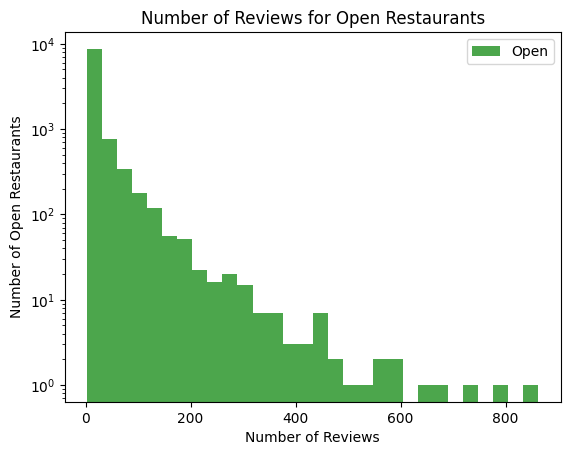

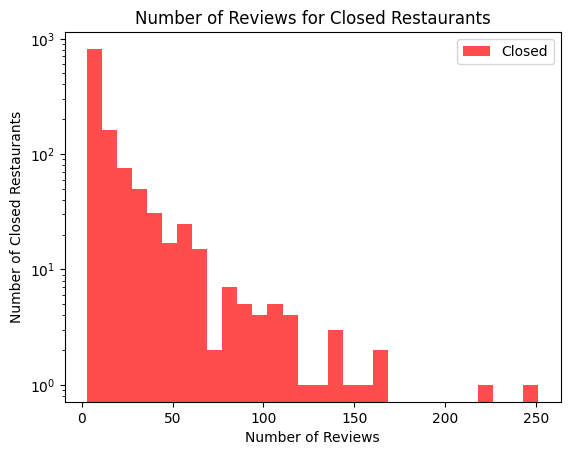

In [19]:
# Plot histogram for the number of reviews for open restaurants
plt.hist(open_restaurants['review_count'], bins=30, color='green', alpha=0.7, label='Open', log=True)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Open Restaurants')
plt.title('Number of Reviews for Open Restaurants')
plt.legend()
plt.show()
print()

# Plot histogram for the number of reviews for closed restaurants
plt.hist(closed_restaurants['review_count'], bins=30, color='red', alpha=0.7, label='Closed', log=True)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Closed Restaurants')
plt.title('Number of Reviews for Closed Restaurants')
plt.legend()
plt.show()

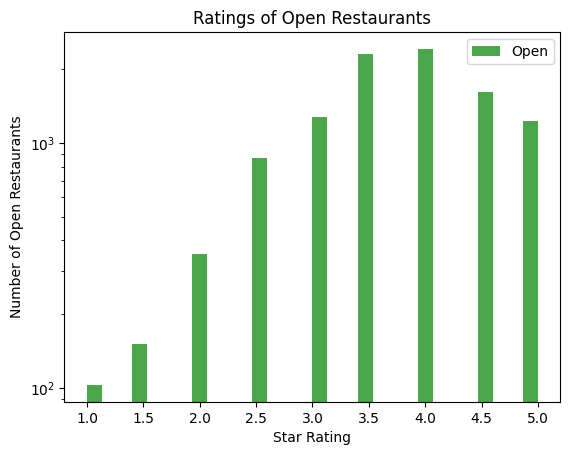

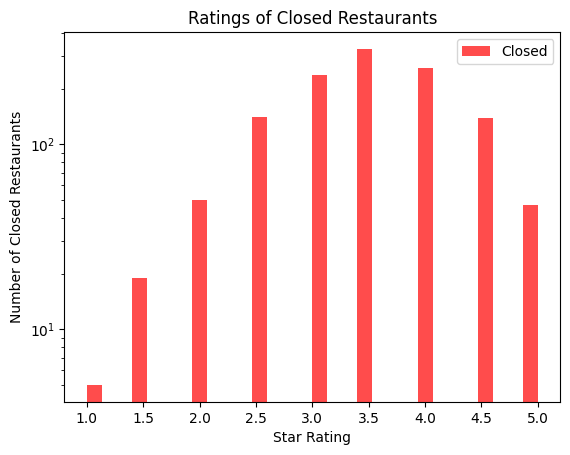

In [20]:
# Plot histogram for star ratings of open restaurants
plt.hist(open_restaurants['stars'], bins=30, color='green', alpha=0.7, label='Open', log=True)
plt.xlabel('Star Rating')
plt.ylabel('Number of Open Restaurants')
plt.title('Ratings of Open Restaurants')
plt.legend()
plt.show()
print()

# Plot histogram for star ratings of closed restaurants
plt.hist(closed_restaurants['stars'], bins=30, color='red', alpha=0.7, label='Closed', log=True)
plt.xlabel('Star Rating')
plt.ylabel('Number of Closed Restaurants')
plt.title('Ratings of Closed Restaurants')
plt.legend()
plt.show()

In [21]:
# Convert string representations of dictionaries to actual dictionaries
df_rev['votes'] = df_rev['votes'].apply(ast.literal_eval)

# Create new columns for 'useful', 'funny', and 'cool' based on the 'votes' column in the review DataFrame
df_rev['useful'] = df_rev['votes'].apply(lambda x: x.get('useful', 0) if isinstance(x, dict) else 0)
df_rev['funny'] = df_rev['votes'].apply(lambda x: x.get('funny', 0) if isinstance(x, dict) else 0)
df_rev['cool'] = df_rev['votes'].apply(lambda x: x.get('cool', 0) if isinstance(x, dict) else 0)

# Display the modified review DataFrame
df_rev

,votes,user_id,review_id,stars,date,text,type,business_id,useful,funny,cool
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,5,0,2
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,0,0,0
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,1,0,0
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,2,0,1
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
229896,"{'funny': 0, 'useful': 0, 'cool': 0}",6e7pZofhDuIlD_rX2oYirQ,f9JaiNg_FMoPNWxt7MlbZQ,2,2011-04-14,I really wanted to like this place because it'...,review,vnffHkFJbmd-J3OaBbK2Eg,0,0,0
229897,"{'funny': 0, 'useful': 2, 'cool': 0}",dDNfSFT0VApxPmURclX6_g,QDWRP1pW5r0huIBAoGmFyg,1,2011-01-23,My husband I stayed here for two nights. Of c...,review,l5oUrgQ190l8CcN8uzd_pA,2,0,0
229898,"{'funny': 0, 'useful': 0, 'cool': 0}",M5wHt6Odh1k5v0tIjqd8DQ,JmR3yk7JlS1LVVxtIc3xBQ,4,2010-10-11,Cool atmosphere. A lot of beers on tap and goo...,review,-EctXOb3B7T177jGYUhjVA,0,0,0
229899,"{'funny': 1, 'useful': 2, 'cool': 0}",jopndPrv-H5KW2CfScnw9A,z5b2p5TbCg0uaIiIe8n62w,3,2011-01-18,I have to take a star off for the spotty servi...,review,YQvg0JCGRFUkb6reMMf3Iw,2,1,0


In [22]:
# Merge the business and review DataFrames on the 'business_id' column
merged_df = pd.merge(df_biz, df_rev, on='business_id')
merged_df.head()

,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,...,votes,user_id,review_id,stars_y,date,text,type_y,useful,funny,cool
0,rncjoVoEFUJGCUoC1JgnUA,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",True,"['Accountants', 'Professional Services', 'Tax ...",Peoria,3,Peoria Income Tax Service,[],-112.241596,AZ,...,"{'funny': 0, 'useful': 1, 'cool': 0}",HK35ai8frY75iMYBVdD_Pg,EnAdKZ_u_wj9ifTRwkfVwg,5,2012-02-12,I highly reccomend this place. They helped my ...,review,1,0,0
1,rncjoVoEFUJGCUoC1JgnUA,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",True,"['Accountants', 'Professional Services', 'Tax ...",Peoria,3,Peoria Income Tax Service,[],-112.241596,AZ,...,"{'funny': 0, 'useful': 1, 'cool': 0}",EtQsLrSaXqWZN8i8Y_zB-A,QkIrHs6Qb9aEPDXi-ulIsw,5,2012-01-03,I received great tax preparation service at a ...,review,1,0,0
2,rncjoVoEFUJGCUoC1JgnUA,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",True,"['Accountants', 'Professional Services', 'Tax ...",Peoria,3,Peoria Income Tax Service,[],-112.241596,AZ,...,"{'funny': 0, 'useful': 1, 'cool': 0}",PahwPVfd6BkDyO8KCFEoWw,fDg_tMd2rGU2dwxzL6V7kQ,5,2012-02-12,I'll never use another cheapy online tax progr...,review,1,0,0
3,0FNFSzCFP_rGUoJx8W7tJg,"2149 W Wood Dr\nPhoenix, AZ 85029",True,"['Sporting Goods', 'Bikes', 'Shopping']",Phoenix,5,Bike Doctor,[],-112.105933,AZ,...,"{'funny': 0, 'useful': 0, 'cool': 0}",_MucjBvznq2y3yDEt9rOHA,yEQacRqY2MJRHTkrUJYLOw,5,2011-06-08,Love love the quick repairs and great service....,review,0,0,0
4,0FNFSzCFP_rGUoJx8W7tJg,"2149 W Wood Dr\nPhoenix, AZ 85029",True,"['Sporting Goods', 'Bikes', 'Shopping']",Phoenix,5,Bike Doctor,[],-112.105933,AZ,...,"{'funny': 0, 'useful': 0, 'cool': 0}",szbTVEtATfn8f9GxbGGO5w,muIhE1HQZscwe06ISMu81A,5,2012-09-21,I couldn't have asked for a better experience!...,review,0,0,0


In [23]:
# Group by 'business_id' and calculate the mean of 'funny', 'useful', and 'cool'
grouped_means = merged_df.groupby('business_id')[['funny', 'useful', 'cool']].mean().reset_index()
grouped_means

,business_id,funny,useful,cool
0,--5jkZ3-nUPZxUvtcbr8Uw,0.454545,0.818182,0.454545
1,--BlvDO_RG2yElKu9XA1_g,0.621622,1.864865,1.189189
2,-0D_CYhlD2ILkmLR0pBmnA,0.400000,1.000000,0.400000
3,-0QBrNvhrPQCaeo7mTo0zQ,0.333333,0.000000,0.000000
4,-0bUDim5OGuv8R0Qqq6J4A,0.333333,0.333333,0.166667
...,...,...,...,...
11532,zyCrtvCPdSZDhUrH86vbeA,0.550000,1.200000,0.900000
11533,zyI8_HQPEwkJ22WMb9ILVQ,0.000000,0.666667,0.000000
11534,zyYRWnimLbQt9aCCI_2MZw,0.333333,0.333333,0.000000
11535,zyZ883vct64bKzNv4wy6Yg,0.500000,1.000000,0.666667


### Fine-tuning BERT for sequence classification on the merged dataset

In [24]:
# Import necessary libraries for fine-tuning BERT for sequence classification
from sklearn.model_selection import train_test_split
from transformers import BertForSequenceClassification, BertTokenizer, AdamW
from torch.utils.data import DataLoader, Dataset
import torch
from tqdm import tqdm

In [25]:
# Split the data into training and validation sets
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_df, val_df = train_test_split(merged_df, test_size=0.2, random_state=42)

class RestaurantDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=128):
        self.df = df
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        review_text = str(self.df.iloc[idx]['text'])
        rating = float(self.df.iloc[idx]['stars_y'])

        encoding = self.tokenizer(review_text, return_tensors='pt', truncation=True, padding='max_length', max_length=self.max_len)
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'rating': torch.tensor(rating, dtype=torch.float32)
        }

train_dataset = RestaurantDataset(train_df, tokenizer)
val_dataset = RestaurantDataset(val_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Training loop
num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['rating'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_loader)
    print(f'Training Loss: {average_loss}')

Epoch 1/3: 100%|██████████| 11495/11495 [1:15:16<00:00,  2.54it/s]


Training Loss: 0.5243720313598146


Epoch 2/3: 100%|██████████| 11495/11495 [1:15:52<00:00,  2.52it/s]


Training Loss: 0.3708365730847313


Epoch 3/3: 100%|██████████| 11495/11495 [1:15:26<00:00,  2.54it/s]

Training Loss: 0.2993964566928166


In [ ]:
# Validation loop
model.eval()
total_val_loss = 0.0

with torch.no_grad():
    for batch in tqdm(val_loader, desc=f'Validation Epoch {epoch + 1}/{num_epochs}'):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['rating'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        val_loss = outputs.loss
        total_val_loss += val_loss.item()

average_val_loss = total_val_loss / len(val_loader)
print(f'Validation Loss: {average_val_loss}')

Validation Epoch 3/3: 100%|██████████| 2874/2874 [08:01<00:00,  5.97it/s]

Validation Loss: 0.41957243365769015


In [ ]:
# Save the fine-tuned model
model.save_pretrained('fine_tuned_bert_model')
tokenizer.save_pretrained('fine_tuned_bert_model')

('fine_tuned_bert_model/tokenizer_config.json',
 'fine_tuned_bert_model/special_tokens_map.json',
 'fine_tuned_bert_model/vocab.txt',
 'fine_tuned_bert_model/added_tokens.json')

### Loading the fine-tuned BERT, predicting and aggregating ratings, saving results to CSV for a batch of texts.


In [26]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the fine-tuned model and tokenizer
model = BertForSequenceClassification.from_pretrained('/content/gdrive/My Drive/Business Success Model/yelp_training_set/fine_tuned_bert_model')
tokenizer = BertTokenizer.from_pretrained('/content/gdrive/My Drive/Business Success Model/yelp_training_set/fine_tuned_bert_model')

In [27]:
# Define a function to aggregate a list of predictions (assumes torch tensors)
def aggregate_predictions(predictions):
    # Stack predictions along the 0th dimension
    stacked_predictions = torch.stack(predictions)

    # Calculate the mean along the 0th dimension (average predictions)
    average_prediction = torch.mean(stacked_predictions, dim=0)

    return average_prediction

In [28]:
# Define a function to predict the rating for a given text using the fine-tuned BERT model
def predict_rating(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)

    # Forward pass through the model
    outputs = model(**inputs)

    # Assuming 'logits' is the key for classification scores in the output
    logits = outputs['logits']

    return logits

In [29]:
# Define a function to predict ratings for a batch of texts and save the predictions to a CSV file
def predict_and_save_batch(texts, start_idx, end_idx, csv_path):
    predictions = [predict_rating(text).item() for text in texts]
    predictions = [round(pred) for pred in predictions]

    # Save predictions to the CSV file
    predictions_df = pd.DataFrame({'predicted_rating': predictions})
    predictions_df.to_csv(csv_path, mode='a', header=(start_idx == 0), index=False)

In [30]:
# Clear the CPU cache to free up memory
torch.cuda.empty_cache()

In [ ]:
# Set the batch size for processing texts
batch_size = 80  # Adjust the batch size based on your available memory

# Set the initial CSV file path for saving predictions
csv_path = 'predictions_review_ratings_combined_full.csv'

### Creating the final dataset for classifier input


In [31]:
# Read the predictions from the CSV file into a DataFrame
result_df_final = pd.read_csv('predictions_review_ratings_combined_full.csv')

In [32]:
# Add the predicted ratings to the original review DataFrame
df_rev['predicted_rating'] = result_df_final['predicted_rating']
df_rev

,votes,user_id,review_id,stars,date,text,type,business_id,useful,funny,cool,predicted_rating
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,5,0,2,5.0
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,0,0,0,5.0
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,1,0,0,5.0
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,2,0,1,5.0
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
229896,"{'funny': 0, 'useful': 0, 'cool': 0}",6e7pZofhDuIlD_rX2oYirQ,f9JaiNg_FMoPNWxt7MlbZQ,2,2011-04-14,I really wanted to like this place because it'...,review,vnffHkFJbmd-J3OaBbK2Eg,0,0,0,4.0
229897,"{'funny': 0, 'useful': 2, 'cool': 0}",dDNfSFT0VApxPmURclX6_g,QDWRP1pW5r0huIBAoGmFyg,1,2011-01-23,My husband I stayed here for two nights. Of c...,review,l5oUrgQ190l8CcN8uzd_pA,2,0,0,2.0
229898,"{'funny': 0, 'useful': 0, 'cool': 0}",M5wHt6Odh1k5v0tIjqd8DQ,JmR3yk7JlS1LVVxtIc3xBQ,4,2010-10-11,Cool atmosphere. A lot of beers on tap and goo...,review,-EctXOb3B7T177jGYUhjVA,0,0,0,2.0
229899,"{'funny': 1, 'useful': 2, 'cool': 0}",jopndPrv-H5KW2CfScnw9A,z5b2p5TbCg0uaIiIe8n62w,3,2011-01-18,I have to take a star off for the spotty servi...,review,YQvg0JCGRFUkb6reMMf3Iw,2,1,0,2.0


In [33]:
# Calculate the final review rating as the average of actual and predicted ratings
df_rev['final_review_rating'] = (df_rev['stars'] + df_rev['predicted_rating']) / 2
df_rev

,votes,user_id,review_id,stars,date,text,type,business_id,useful,funny,cool,predicted_rating,final_review_rating
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg,5,0,2,5.0,5.0
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow,0,0,0,5.0,5.0
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA,1,0,0,5.0,4.5
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg,2,0,1,5.0,5.0
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw,0,0,0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229896,"{'funny': 0, 'useful': 0, 'cool': 0}",6e7pZofhDuIlD_rX2oYirQ,f9JaiNg_FMoPNWxt7MlbZQ,2,2011-04-14,I really wanted to like this place because it'...,review,vnffHkFJbmd-J3OaBbK2Eg,0,0,0,4.0,3.0
229897,"{'funny': 0, 'useful': 2, 'cool': 0}",dDNfSFT0VApxPmURclX6_g,QDWRP1pW5r0huIBAoGmFyg,1,2011-01-23,My husband I stayed here for two nights. Of c...,review,l5oUrgQ190l8CcN8uzd_pA,2,0,0,2.0,1.5
229898,"{'funny': 0, 'useful': 0, 'cool': 0}",M5wHt6Odh1k5v0tIjqd8DQ,JmR3yk7JlS1LVVxtIc3xBQ,4,2010-10-11,Cool atmosphere. A lot of beers on tap and goo...,review,-EctXOb3B7T177jGYUhjVA,0,0,0,2.0,3.0
229899,"{'funny': 1, 'useful': 2, 'cool': 0}",jopndPrv-H5KW2CfScnw9A,z5b2p5TbCg0uaIiIe8n62w,3,2011-01-18,I have to take a star off for the spotty servi...,review,YQvg0JCGRFUkb6reMMf3Iw,2,1,0,2.0,2.5


In [34]:
# Group by business ID and calculate mean, median, and standard deviation of final review ratings
grouped_data_rating = df_rev.groupby('business_id')['final_review_rating'].agg(['mean', 'median', 'std']).reset_index()
grouped_data_rating.head()

,business_id,mean,median,std
0,--5jkZ3-nUPZxUvtcbr8Uw,4.090909,4.0,0.889331
1,--BlvDO_RG2yElKu9XA1_g,3.689189,4.0,0.884679
2,-0D_CYhlD2ILkmLR0pBmnA,3.900000,4.5,1.083974
3,-0QBrNvhrPQCaeo7mTo0zQ,4.333333,4.0,0.577350
4,-0bUDim5OGuv8R0Qqq6J4A,3.250000,3.5,0.935414


In [35]:
# Merge grouped means and grouped final review rating data on business ID
df_new = pd.merge(grouped_means, grouped_data_rating, on='business_id', how='inner')
df_new

,business_id,funny,useful,cool,mean,median,std
0,--5jkZ3-nUPZxUvtcbr8Uw,0.454545,0.818182,0.454545,4.090909,4.00,0.889331
1,--BlvDO_RG2yElKu9XA1_g,0.621622,1.864865,1.189189,3.689189,4.00,0.884679
2,-0D_CYhlD2ILkmLR0pBmnA,0.400000,1.000000,0.400000,3.900000,4.50,1.083974
3,-0QBrNvhrPQCaeo7mTo0zQ,0.333333,0.000000,0.000000,4.333333,4.00,0.577350
4,-0bUDim5OGuv8R0Qqq6J4A,0.333333,0.333333,0.166667,3.250000,3.50,0.935414
...,...,...,...,...,...,...,...
11532,zyCrtvCPdSZDhUrH86vbeA,0.550000,1.200000,0.900000,4.050000,4.50,0.872082
11533,zyI8_HQPEwkJ22WMb9ILVQ,0.000000,0.666667,0.000000,3.333333,3.00,1.040833
11534,zyYRWnimLbQt9aCCI_2MZw,0.333333,0.333333,0.000000,4.666667,4.50,0.288675
11535,zyZ883vct64bKzNv4wy6Yg,0.500000,1.000000,0.666667,4.000000,4.25,0.894427


In [36]:
# Add additional business-related information to the new DataFrame
df_new['review_count'] = df_biz['review_count']
df_new['business_rating'] = df_biz['stars']
df_new['open'] = df_biz['open']
df_new

,business_id,funny,useful,cool,mean,median,std,review_count,business_rating,open
0,--5jkZ3-nUPZxUvtcbr8Uw,0.454545,0.818182,0.454545,4.090909,4.00,0.889331,3,5.0,True
1,--BlvDO_RG2yElKu9XA1_g,0.621622,1.864865,1.189189,3.689189,4.00,0.884679,5,5.0,True
2,-0D_CYhlD2ILkmLR0pBmnA,0.400000,1.000000,0.400000,3.900000,4.50,1.083974,4,5.0,True
3,-0QBrNvhrPQCaeo7mTo0zQ,0.333333,0.000000,0.000000,4.333333,4.00,0.577350,5,3.5,True
4,-0bUDim5OGuv8R0Qqq6J4A,0.333333,0.333333,0.166667,3.250000,3.50,0.935414,14,3.5,True
...,...,...,...,...,...,...,...,...,...,...
11532,zyCrtvCPdSZDhUrH86vbeA,0.550000,1.200000,0.900000,4.050000,4.50,0.872082,18,3.0,True
11533,zyI8_HQPEwkJ22WMb9ILVQ,0.000000,0.666667,0.000000,3.333333,3.00,1.040833,25,3.5,True
11534,zyYRWnimLbQt9aCCI_2MZw,0.333333,0.333333,0.000000,4.666667,4.50,0.288675,3,4.5,True
11535,zyZ883vct64bKzNv4wy6Yg,0.500000,1.000000,0.666667,4.000000,4.25,0.894427,23,3.5,True


In [37]:
# Rename multiple columns for clarity
df_new = df_new.rename(columns={'funny': 'funny_votes_mean', 'cool': 'cool_votes_mean', 'useful': 'useful_votes_mean', 'mean': 'mean_review_ratings', 'median': 'median_review_ratings', 'std': 'std_review_ratings'})
df_new


,business_id,funny_votes_mean,useful_votes_mean,cool_votes_mean,mean_review_ratings,median_review_ratings,std_review_ratings,review_count,business_rating,open
0,--5jkZ3-nUPZxUvtcbr8Uw,0.454545,0.818182,0.454545,4.090909,4.00,0.889331,3,5.0,True
1,--BlvDO_RG2yElKu9XA1_g,0.621622,1.864865,1.189189,3.689189,4.00,0.884679,5,5.0,True
2,-0D_CYhlD2ILkmLR0pBmnA,0.400000,1.000000,0.400000,3.900000,4.50,1.083974,4,5.0,True
3,-0QBrNvhrPQCaeo7mTo0zQ,0.333333,0.000000,0.000000,4.333333,4.00,0.577350,5,3.5,True
4,-0bUDim5OGuv8R0Qqq6J4A,0.333333,0.333333,0.166667,3.250000,3.50,0.935414,14,3.5,True
...,...,...,...,...,...,...,...,...,...,...
11532,zyCrtvCPdSZDhUrH86vbeA,0.550000,1.200000,0.900000,4.050000,4.50,0.872082,18,3.0,True
11533,zyI8_HQPEwkJ22WMb9ILVQ,0.000000,0.666667,0.000000,3.333333,3.00,1.040833,25,3.5,True
11534,zyYRWnimLbQt9aCCI_2MZw,0.333333,0.333333,0.000000,4.666667,4.50,0.288675,3,4.5,True
11535,zyZ883vct64bKzNv4wy6Yg,0.500000,1.000000,0.666667,4.000000,4.25,0.894427,23,3.5,True


In [38]:
# Filter open restaurants from the combined DataFrame
df_open = df_new[df_new['open'] == True]
df_open

,business_id,funny_votes_mean,useful_votes_mean,cool_votes_mean,mean_review_ratings,median_review_ratings,std_review_ratings,review_count,business_rating,open
0,--5jkZ3-nUPZxUvtcbr8Uw,0.454545,0.818182,0.454545,4.090909,4.00,0.889331,3,5.0,True
1,--BlvDO_RG2yElKu9XA1_g,0.621622,1.864865,1.189189,3.689189,4.00,0.884679,5,5.0,True
2,-0D_CYhlD2ILkmLR0pBmnA,0.400000,1.000000,0.400000,3.900000,4.50,1.083974,4,5.0,True
3,-0QBrNvhrPQCaeo7mTo0zQ,0.333333,0.000000,0.000000,4.333333,4.00,0.577350,5,3.5,True
4,-0bUDim5OGuv8R0Qqq6J4A,0.333333,0.333333,0.166667,3.250000,3.50,0.935414,14,3.5,True
...,...,...,...,...,...,...,...,...,...,...
11532,zyCrtvCPdSZDhUrH86vbeA,0.550000,1.200000,0.900000,4.050000,4.50,0.872082,18,3.0,True
11533,zyI8_HQPEwkJ22WMb9ILVQ,0.000000,0.666667,0.000000,3.333333,3.00,1.040833,25,3.5,True
11534,zyYRWnimLbQt9aCCI_2MZw,0.333333,0.333333,0.000000,4.666667,4.50,0.288675,3,4.5,True
11535,zyZ883vct64bKzNv4wy6Yg,0.500000,1.000000,0.666667,4.000000,4.25,0.894427,23,3.5,True


In [39]:
# Filter closed restaurants from the combined DataFrame
df_closed = df_new[df_new['open'] == False]
df_closed

,business_id,funny_votes_mean,useful_votes_mean,cool_votes_mean,mean_review_ratings,median_review_ratings,std_review_ratings,review_count,business_rating,open
21,-6O53B-ksqSKzWM6Y9moEQ,0.714286,1.142857,0.714286,3.428571,3.50,0.672593,11,3.0,False
22,-6Roo-EHgSdUa4rP3tWyRw,0.439024,0.682927,0.317073,3.585366,4.00,0.907624,42,3.5,False
26,-7smFzvh2E2fOOYs-0Dl8w,0.750000,1.500000,0.250000,3.500000,3.25,0.707107,85,3.0,False
32,-8wyZkzfBmCFkMwCGcR4PQ,1.818182,2.727273,2.212121,3.636364,3.50,0.731786,4,5.0,False
33,-92fePI5W6MwOaxMxphFjA,0.166667,0.333333,0.166667,3.583333,3.25,0.970395,9,3.0,False
...,...,...,...,...,...,...,...,...,...,...
11498,zn9it0OA4lUdLYgcMSjlVA,0.333333,0.666667,0.000000,4.666667,4.50,0.288675,10,3.0,False
11509,zp713qNhx8d9KCJJnrw1xA,0.828383,1.808581,1.095710,3.968647,4.00,0.764381,23,3.0,False
11514,zr6Ic3XVUYSKzoJoXjAz-g,0.500000,0.750000,0.250000,4.000000,4.00,0.912871,11,4.0,False
11515,zrO-RPR3fSdA7sI-IRGWIQ,0.333333,0.500000,0.166667,3.833333,4.25,1.290994,19,4.0,False


In [40]:
# Calculate the percentage of closed restaurants
percentage_closed = len(df_closed) / len(df_new)
percentage_closed

0.10609343850221029

In [41]:
# Drop a random sample of rows from the open restaurant DataFrame to balance the dataset
df_open.drop(df_open.sample(1313).index, inplace=True)
print(len(df_open))

9000


<ipython-input-41-0fb92c77c062>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open.drop(df_open.sample(1313).index, inplace=True)


In [42]:
# Set the desired number of rows for the combined DataFrame
desired_rows = 3000

# Calculate how many rows need to be duplicated
rows_to_duplicate = desired_rows - len(df_closed)

# Randomly duplicate rows from the closed restaurant DataFrame
duplicate_rows = df_closed.sample(n=rows_to_duplicate, replace=True)

# Append the duplicated rows to the original closed restaurant DataFrame
df_closed = df_closed.append(duplicate_rows, ignore_index=True)

print(len(df_closed))

3000


<ipython-input-42-db438d0f1dfa>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_closed = df_closed.append(duplicate_rows, ignore_index=True)


In [43]:
# Combine the open and duplicated closed restaurant DataFrames
df_combined = pd.concat([df_open, df_closed], ignore_index=True)
df_combined

,business_id,funny_votes_mean,useful_votes_mean,cool_votes_mean,mean_review_ratings,median_review_ratings,std_review_ratings,review_count,business_rating,open
0,--5jkZ3-nUPZxUvtcbr8Uw,0.454545,0.818182,0.454545,4.090909,4.00,0.889331,3,5.0,True
1,-0D_CYhlD2ILkmLR0pBmnA,0.400000,1.000000,0.400000,3.900000,4.50,1.083974,4,5.0,True
2,-0QBrNvhrPQCaeo7mTo0zQ,0.333333,0.000000,0.000000,4.333333,4.00,0.577350,5,3.5,True
3,-0xwm_AwS0d_5rwUprHGuw,1.625000,2.250000,1.750000,3.500000,3.50,0.816497,6,4.5,True
4,-1-sUowC7fJ-cn7mCxvJ5w,0.000000,0.666667,0.000000,3.166667,3.00,1.755942,21,3.5,True
...,...,...,...,...,...,...,...,...,...,...
11995,Yb2pNCxYR32XKmpirqJqeQ,0.320000,1.480000,0.800000,4.020000,4.50,0.883648,15,4.5,False
11996,5Isf5xz3rNZk0y79UE6uIw,0.000000,0.750000,0.000000,3.375000,3.00,0.750000,5,3.5,False
11997,4T6o8B6shDYGNAGQuGSTcQ,0.666667,0.833333,0.666667,3.750000,3.75,0.689202,3,2.5,False
11998,v4vMWnv-oQWVBe7MkRQDrA,0.333333,1.000000,0.000000,4.666667,4.50,0.288675,3,3.0,False


In [44]:
filepath = "/content/gdrive/My Drive/Business Success Model/yelp_training_set/final_dataset.csv"
df_combined.to_csv(filepath, index=False)

In [45]:
# Calculate the percentage of closed restaurants in the final combined DataFrame
percentage_closed_combined = len(df_closed) / len(df_combined)
percentage_closed_combined

0.25